# Uber Supply Demand Gap

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the Pandas, Numpy, Datetime, Matplotlib, and Seaborn libraries.

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Sourcing, Cleaning and Preparation
<b> Read the Uber data, inspect, clean, and manipulate the data

In [6]:
# Read the uber data in to a dataframe
# Convert the date fields to date time and since the date in the source data has different formats and it is possible for the 
# day and month to be interchanged, have specified dayfirst to true

In [7]:
uber = pd.read_csv('Uber_Request_Data.csv')

In [8]:
# Addressing data quality issue and converting drop timestamp and request timestamp to datetime format

In [9]:
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], format='%m/%d/%Y %H:%M', errors='coerce')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], format='%m/%d/%Y %H:%M', errors='coerce')

In [10]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,NaT,NaT


In [11]:
#Inspect uber dataframe

In [12]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  2674 non-null   datetime64[ns]
 5   Drop timestamp     1150 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
uber.shape

(6745, 6)

In [14]:
uber.describe()

,Request id,Driver id,Request timestamp,Drop timestamp
count,6745.000000,4095.000000,2674,1150
mean,3384.644922,149.501343,2016-11-22 05:26:05.789080064,2016-11-22 09:16:02.295652352
min,1.000000,1.000000,2016-11-07 00:00:00,2016-11-07 00:51:00
25%,1691.000000,75.000000,2016-11-07 12:58:00,2016-11-07 13:29:15
50%,3387.000000,149.000000,2016-11-07 23:13:30,2016-11-07 23:45:30
75%,5080.000000,224.000000,2016-12-07 13:24:45,2016-12-07 12:26:00
max,6766.000000,300.000000,2016-12-07 23:54:00,2016-12-07 23:45:00
std,1955.099667,86.051994,NaN,NaN


In [15]:
uber.isnull().any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp     True
Drop timestamp        True
dtype: bool

In [16]:
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp    4071
Drop timestamp       5595
dtype: int64

In [17]:
# Convert driver id field from float to int and replace the nan values to 0. This field will not be used for any computation and
# hence no harm in computing the values to 0

In [18]:
uber['Driver id'] = uber['Driver id'].fillna(0).astype(int)

In [19]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int64         
 3   Status             6745 non-null   object        
 4   Request timestamp  2674 non-null   datetime64[ns]
 5   Drop timestamp     1150 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 316.3+ KB


In [20]:
# Remove Drop timestamp column as we will not be using it for any calculations. Hence safe to remove.

In [21]:
uber = uber.drop(['Drop timestamp'], axis = 1)

In [22]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00
2,1807,City,1,Trip Completed,2016-12-07 09:17:00
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00
4,3112,City,1,Trip Completed,NaT


In [23]:
# Fill NaT values with a default date or drop rows with NaT values
uber['Request timestamp'] = uber['Request timestamp'].fillna(uber['Request timestamp'].mode()[0])

In [24]:
# Create a new column called request hour from the request timestamp column

In [25]:
uber['Request hour'] = uber['Request timestamp'].apply(lambda x: x.strftime('%H'))

In [26]:
uber['Request hour'] = uber['Request hour'].astype(int)

In [27]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,11
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,17
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,21
4,3112,City,1,Trip Completed,2016-11-07 08:37:00,8


In [28]:
# Create a new column from the hours column with the following assumptions

In [29]:
# 4:00Am to 7:59Am is Early morning
# 8:00Am to 11:59Am is Morning
# 12:00Pm to 15:59Pm is Afternoon
# 16:00Pm to 19:59Pm is Evening
# 20:00Pm to 23:59Pm is Night
# 24:00Am to 3:59Am is late Night

In [30]:
def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'

uber['Request timeslot'] = uber['Request hour'].apply(timeslot)

In [31]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-11-07 08:37:00,8,Morning


In [32]:
# Create a new column called day of week and fetch the the day of week from the request timestamp column

In [33]:
uber['Request day of week'] = uber['Request timestamp'].dt.day_name()

In [34]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request day of week
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,9,Morning,Wednesday
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,21,Night,Wednesday
4,3112,City,1,Trip Completed,2016-11-07 08:37:00,8,Morning,Monday


## Data Analysis

<b>  Step 1 -  Analyze the number of requests for all trip status (Trip completed, Cancelled, and No cars available)

In [37]:
order_status = uber['Status'].sort_values(ascending = True).unique().tolist()

In [38]:
order_status

['Cancelled', 'No Cars Available', 'Trip Completed']

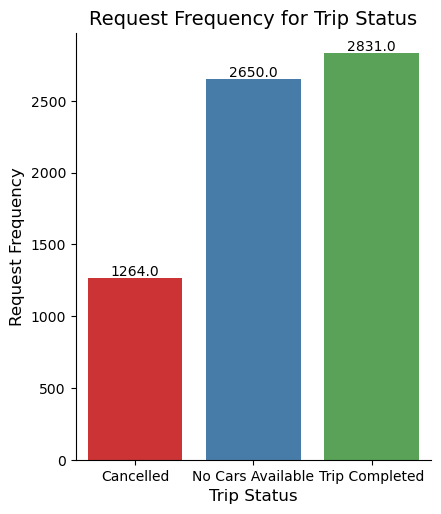

In [39]:
plot = sns.catplot(x = 'Status', kind = 'count', data = uber, palette = 'Set1', aspect = .9, order = order_status)

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel('Trip Status', fontsize = 12)
plt.ylabel('Request Frequency', fontsize = 12)

#Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=10, color='black', ha='center', 
             va='bottom')
    

plt.show()

<b> Step 2 - Identify the number of requests for trips originating from airport and city for all the 3 trip status.

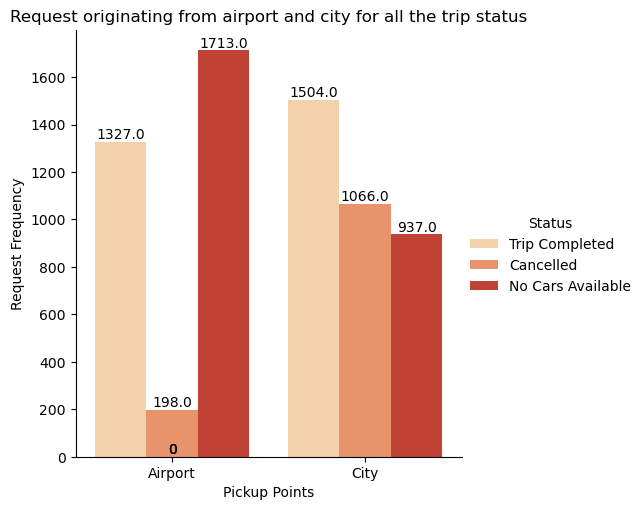

In [41]:
plot = sns.catplot(x = 'Pickup point', hue = 'Status', palette = 'OrRd', kind = 'count', data = uber)

plt.title('Request originating from airport and city for all the trip status', fontsize = 12)
plt.xlabel('Pickup Points')
plt.ylabel('Request Frequency')

#print counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), color = 'black', ha = 'center', va = 'bottom')

plt.show()

Following observations can be made from the above graph:
* In case of of trips completed status, the demand is more for trips from city than airport.
* For cancelled status - the cancellation is more for trips from city than airport.
* For No cars available - more number of cars are not available for trips from airport than city.

<b> Step 3 - Identify whether days of week has any impact on the number of requests from airport and city for 'cancelled' and 'No cars available' trip status

In [44]:
# Since there are only week days in the data provided and no week ends, have only considered the week days for sorting

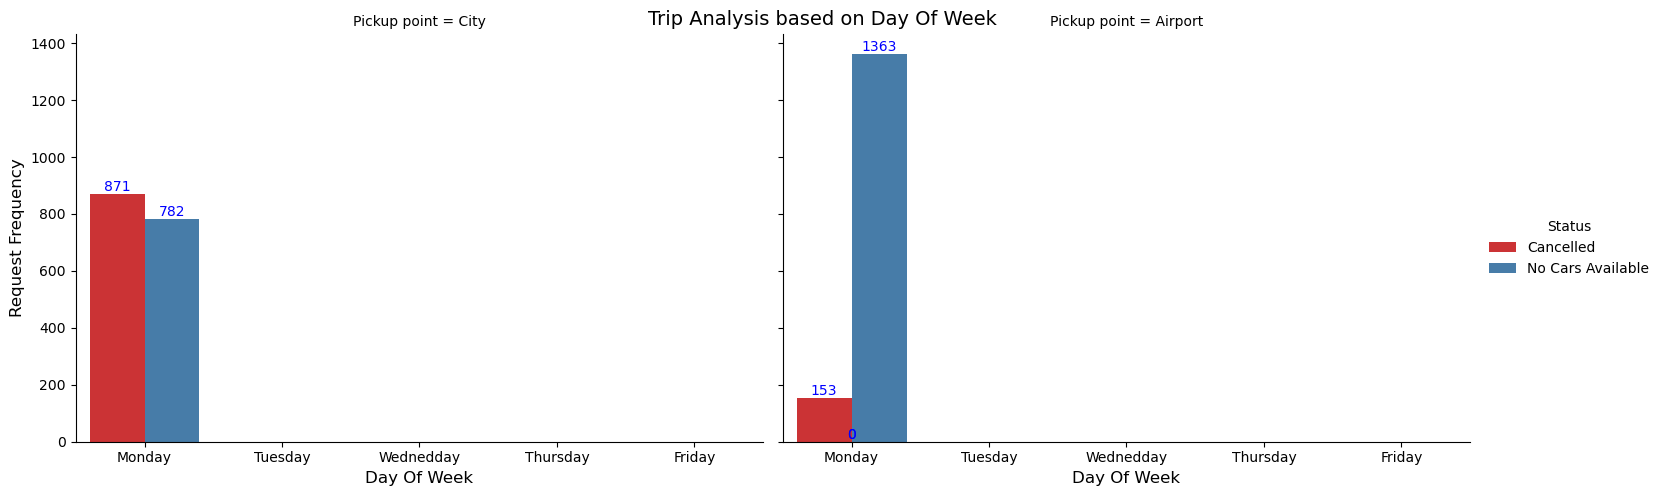

In [45]:
order_days = ['Monday', 'Tuesday', 'Wednedday', 'Thursday', 'Friday']

filter_trip_status_df = uber[(uber['Status'] == 'Cancelled') | (uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x = 'Request day of week', col = 'Pickup point', hue = 'Status', palette ='Set1', kind = 'count', data = filter_trip_status_df
                  ,aspect = 1.5, order = order_days)

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

#print counts
for i in range(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
    
        height = int(height)
        ax.text(p.get_x() + p.get_width()/2, height, height, color = 'blue', ha = 'center', va = 'bottom')

plt.show()

Following can be inferred from the above graph.
- for trips from city than airport, cancelled the trips are more.
- for trips from airport than city, No cars available is more.

<b> Step 4: Analyze the request frequency of cars for cancelled trips from airport & city for all timeslots.

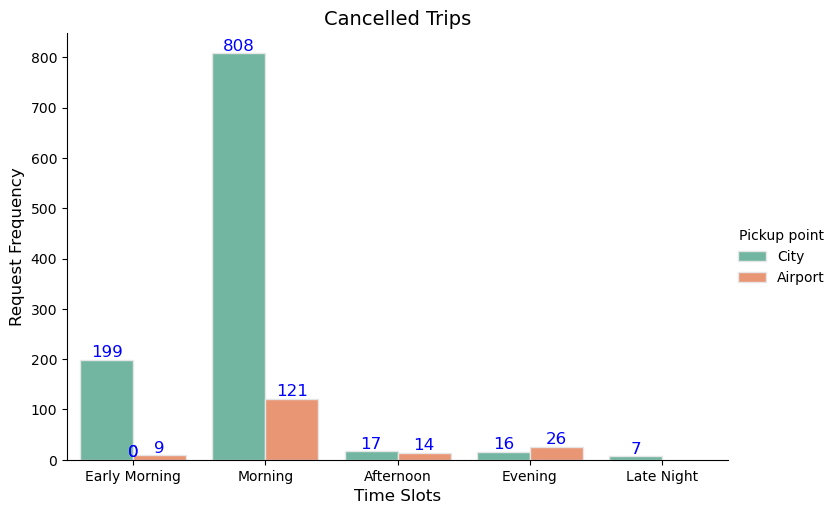

In [48]:
# The order of display the time slots
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night']

cancelled_df = uber[(uber['Status'] == 'Cancelled')]

plot = sns.catplot(x = 'Request timeslot', hue = 'Pickup point', kind = 'count', palette = 'Set2', 
                   edgecolor = '0.9', aspect = 1.5, data = cancelled_df, order = order_timeslot)
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

# print the count

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Above graph shows that maximum number of cancellations happen for trips from city than airport, during the hours of Early Morning followed by Morning hours i.e., between 4:00 AM and 11:59 AM. <br>

<b> Step 5: Identify the approximate hour when more trips are cancelled during the identified timeslots and pickup point.

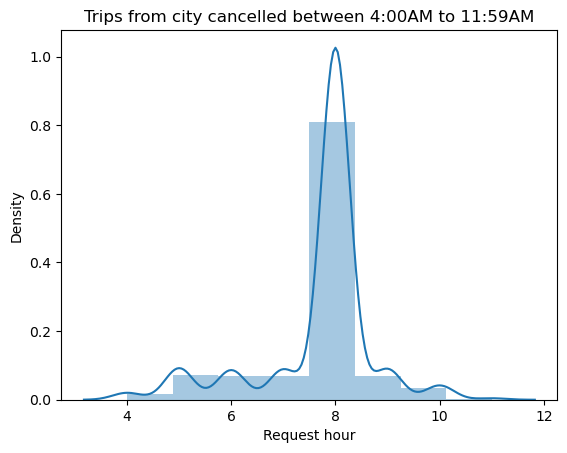

In [51]:
morning_cancellation_df = cancelled_df[(((cancelled_df['Request timeslot'] == 'Early Morning') | (cancelled_df['Request timeslot'] == 'Morning'))
                                        & (cancelled_df['Pickup point'] == 'City'))]
plt.title('Trips from city cancelled between 4:00AM to 11:59AM')

sns.distplot(morning_cancellation_df['Request hour'], bins = 8)

plt.show()

The plot above shows that the number of cars cancelled is more around 5:00 AM, followed by 6:00 AM, 7:00 AM and 8:00 AM.

<b>Step 6 - Analyse the request frequency for Non Available Cars from airport & city for all timeslots. 

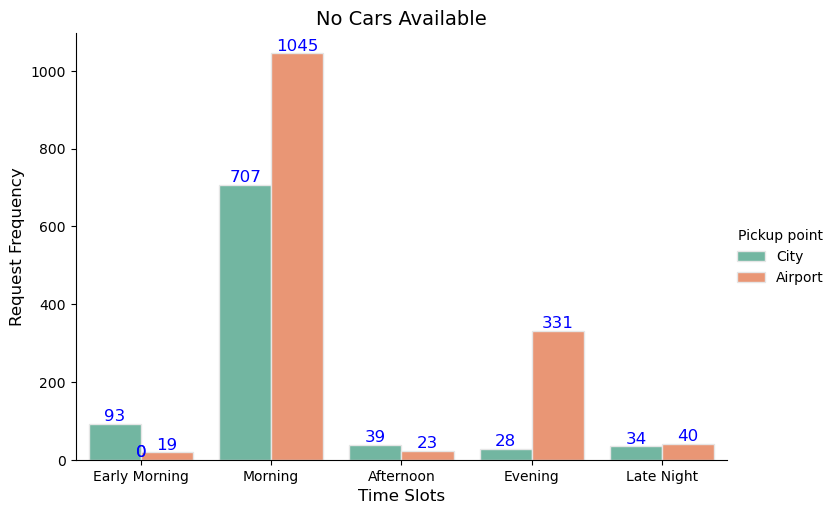

In [54]:
# The order of display the time slots
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night']

no_cars_available_df = uber[(uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x = 'Request timeslot', hue = 'Pickup point', kind = 'count', palette = 'Set2', 
                   edgecolor = '0.9', aspect = 1.5, data = no_cars_available_df, order = order_timeslot)
plt.title('No Cars Available', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

# print the count

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

The above graph shows that maximum number of cars not available are from airport than city, during the morning hours followed by evening ie between 4:00 PM and 8:00 PM

<b>Step 7 - Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

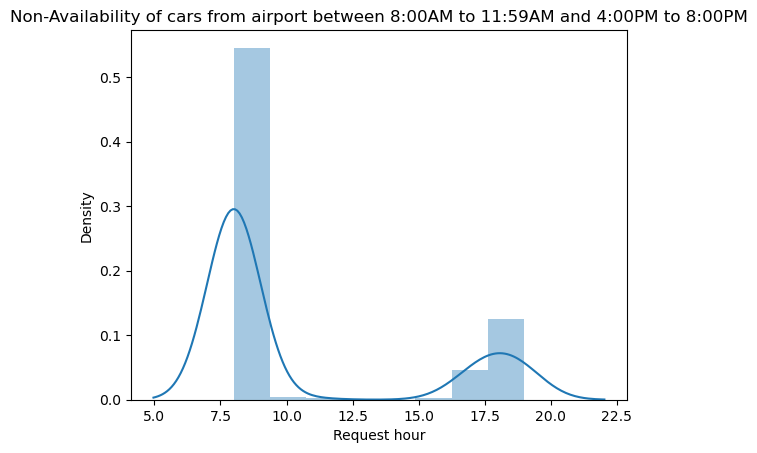

In [57]:
evening_unavailable_cars_df = no_cars_available_df[(((no_cars_available_df['Request timeslot'] == 'Evening') 
                                                     | (no_cars_available_df['Request timeslot'] == 'Morning')) 
                                                    & (no_cars_available_df['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 8:00AM to 11:59AM and 4:00PM to 8:00PM') 
sns.distplot(evening_unavailable_cars_df['Request hour'], bins=8) 
plt.show()

The above plot shows that more number of cars are unavailable around 8:00 AM 

Hence, the most pressing problem is as follows :
    - More cars are cancelled from city than airport, for timeslots between 4:00 AM and 11:59 AM
    - More cars are unavailable from airport than city, for timeslots between between 8:00AM to 11:59AM and 4:00PM to 8:00PM

##### Supply demand gap can be calculated as follows :
    - Demand = Number of cars requested
    - Supply = Cars that completed the trips.
    - Supply Demand Gap = Cancelled cars plus unavailable cars

In [60]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
uber['Supply demand gap'] = uber['Status'].apply(setSupplyorSupplyDemandGap)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request day of week,Supply demand gap
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,11,Morning,Monday,Supply
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,17,Evening,Monday,Supply
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,9,Morning,Wednesday,Supply
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,21,Night,Wednesday,Supply
4,3112,City,1,Trip Completed,2016-11-07 08:37:00,8,Morning,Monday,Supply


<b>Step 8 - Analyse the demand for cabs for each timeslots for trips from airport and city.</b> 

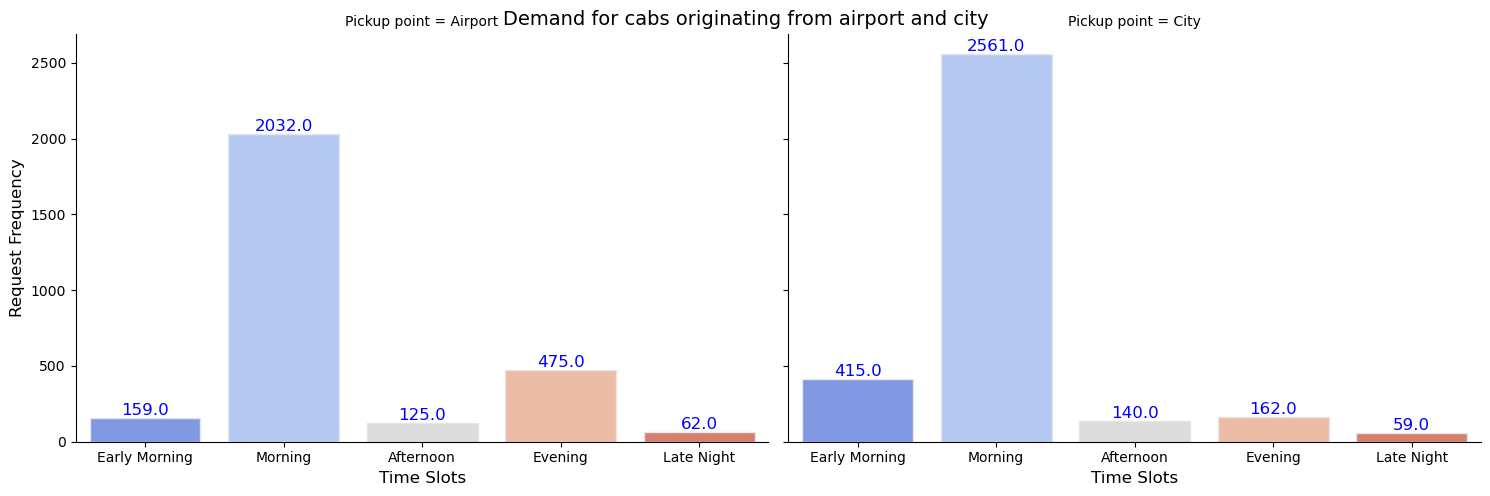

In [62]:
plot = sns.catplot(x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# print the counts

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')

plt.show()

Irrespective of the trip status, following can be deduced from the above plots :  

    - For airport pickups, demand is more during the Morning and Evening
    - For city pickups, demand is more during the early morning and morning

<b>Step 9 - Find the time slots when the highest supply demand gap exists

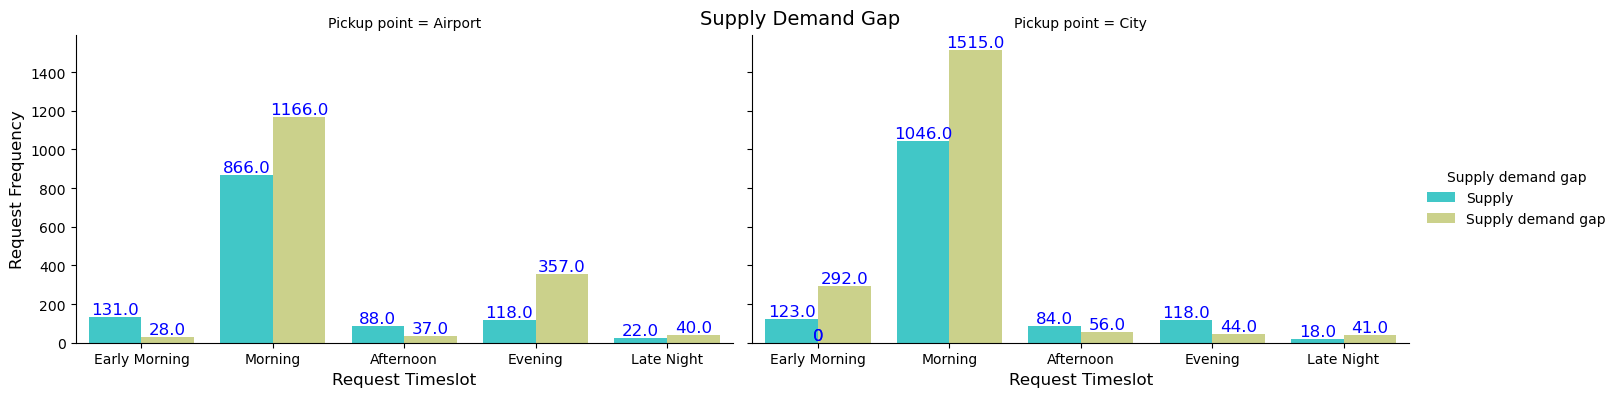

In [65]:
plot = sns.catplot(x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', data=uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# print the count

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')
        
plt.show()

###### The above plot shows the following :
    
    - Supply demand gap is more in the morning (8:00 AM to 11:59 AM) and evening (4:00 PM to 7:59 PM) for trips from Airport
      to City.
    - Supply demand gap is more in the early morning (4:00 AM to 7:59 AM) and morning (8:00 AM to 11:59 AM) for trips from
      City to Airport  

<b>Step 10 - Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified 
        time slots   

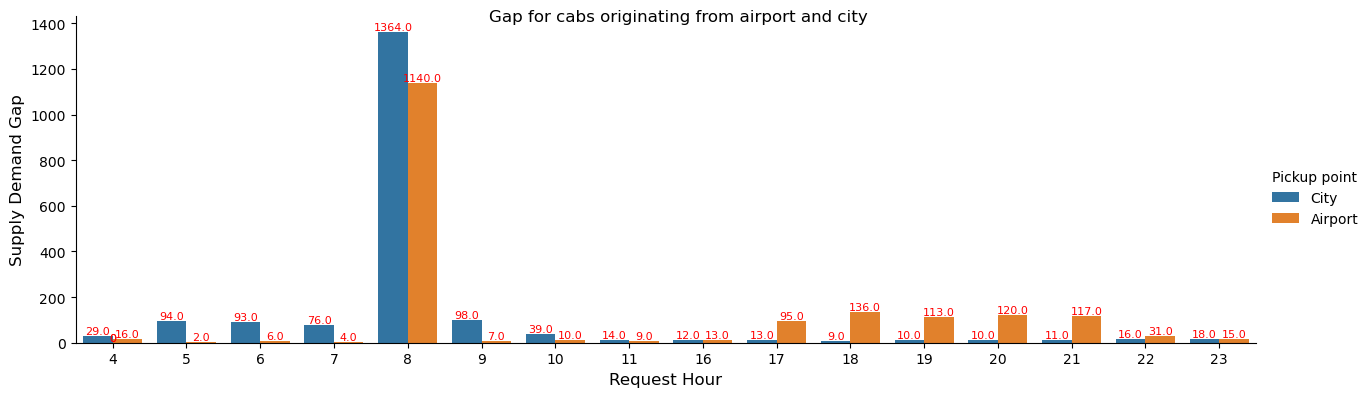

In [68]:
# filter based on the request time slots and supply demand gap

most_severe_gap_df = uber[((uber['Request timeslot'] == 'Evening') |
                           (uber['Request timeslot'] == 'Night') | 
                           (uber['Request timeslot'] == 'Early Morning') | 
                           (uber['Request timeslot'] == 'Morning')) & 
                          (uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request hour", hue="Pickup point", data=most_severe_gap_df, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)

# print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=8, color='red', ha='center', va='bottom')

plt.show()

The above plot shows that the most severe supply demand gap is for the trip request at 8:00AM

<b> Analysis Conclusion : </b>
    - The supply demand gap for cab requests from airport to city is more during evening and night hours, maximizing at 
      6:00 PM
    - The supply demand gap for cab requests from city to airport is more during early morning and morning hours, maximizing 
      at 8:00 AM
    - Most severe supply demand gap is for trip from airport to city between 8:00 AM to 9:00 AM, maximizing at 8:00 AM